# YOLACT Google Colab Notebook

# Initial Setup

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import matplotlib.pyplot as plt

# Dark mode
plt.style.use(['dark_background'])

## Clone the repo

In [3]:
# Make sure we're in the top folder
%cd /content

# Clone the repo
!git clone https://github.com/Maxinho96/yolact

/content
Cloning into 'yolact'...
remote: Enumerating objects: 3102, done.
remote: Total 3102 (delta 0), reused 0 (delta 0), pack-reused 3102
Receiving objects: 100% (3102/3102), 21.44 MiB | 27.24 MiB/s, done.
Resolving deltas: 100% (2117/2117), done.


In [6]:
# Pull in case of modifications
%cd /content/yolact/
!git pull

/content/yolact
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/Maxinho96/yolact
   9df89a4..d57e4b2  master     -> origin/master
Updating 9df89a4..d57e4b2
Fast-forward
 data/config.py | 51 +++++++++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 51 insertions(+)


## DCNv2
The DCNv2 external library is needed for this to work, so we'll build it now.

**IF YOU GET CUDA ERRORS** You need to change the Runtime of this notebook to "GPU" as mentioned at the top of the notebook.

In [4]:
# Change to the right directory
%cd /content/yolact/external/DCNv2

# Build DCNv2
!python setup.py build develop

/content/yolact/external/DCNv2
running build
running build_ext
building '_ext' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/content
creating build/temp.linux-x86_64-3.6/content/yolact
creating build/temp.linux-x86_64-3.6/content/yolact/external
creating build/temp.linux-x86_64-3.6/content/yolact/external/DCNv2
creating build/temp.linux-x86_64-3.6/content/yolact/external/DCNv2/src
creating build/temp.linux-x86_64-3.6/content/yolact/external/DCNv2/src/cpu
creating build/temp.linux-x86_64-3.6/content/yolact/external/DCNv2/src/cuda
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -DWITH_CUDA -I/content/yolact/external/DCNv2/src -I/usr/local/lib/python3.6/dist-packages/torch/include -I/usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include -I/usr/local/lib/python3.6/dist-packages/torch/include/TH -I/usr/local/

## Pretrained Weights
In order to run inference, we'll need some pre-trained weights. The creator of the GitHub repo shared them on Google Drive. We're going to use a [helpful tool](https://github.com/chentinghao/download_google_drive) made by [chentinghao](https://github.com/chentinghao) to easily access the Drive file from Colab.

If this stops working, it's probably because the weights moved to a different location. Check the YOLACT github repo to see where they went.

In [5]:
# Make sure we're in the top folder
%cd /content

# Clone the repo
!git clone https://github.com/chentinghao/download_google_drive.git

# Create a new directory for the pre-trained weights
!mkdir -p /content/yolact/weights

# Download the file
!python ./download_google_drive/download_gdrive.py 1ZPu1YR2UzGHQD0o1rEqy-j5bmEm3lbyP ./yolact/weights/yolact_plus_resnet50_54_800000.pth

/content
Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.
129MB [00:01, 114MB/s]


## Install OCHuman API

In [0]:
%cd /content

!git clone https://github.com/Maxinho96/OCHumanApi
%cd OCHumanApi
!make install

/content
Cloning into 'OCHumanApi'...
remote: Enumerating objects: 77, done.
remote: Total 77 (delta 0), reused 0 (delta 0), pack-reused 77
Unpacking objects: 100% (77/77), done.
/content/OCHumanApi
# install ochumanApi to the Python site-packages
python setup.py build_ext install
Compiling ochumanApi/_mask.pyx because it changed.
[1/1] Cythonizing ochumanApi/_mask.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/OCHumanApi/ochumanApi/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'ochumanApi._mask' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/ochumanApi
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -IochumanApi -I/usr/local/li

# Evaluate pretrained model

## Run inference on test video

In [10]:
%cd /content/yolact

# Make multithreading work by changing 'rescore_bbox': False, in yolact_plus_base_config in data/config.py to 'rescore_bbox': True
file_path = "/content/gdrive/My\ Drive/yolact/data/test.mp4"
output_path = "/content/gdrive/My\ Drive/yolact/data/test_output.mp4"
!python eval.py --trained_model=/content/gdrive/My\ Drive/yolact/data/checkpoints/exp16/yolact_plus_resnet50_cityscapes_exp16_12_3500.pth --config=yolact_plus_resnet50_cityscapes_exp16_config --score_threshold=0.15 --top_k=15 --video={file_path}:{output_path} --video_multiframe=1

/content/yolact
Loading model... Done.
Initializing model... Done.

Processing FPS: 0.00 | Video Playback FPS: 15.67 | Frames in Buffer: 0    


### Download COCO val

In [0]:
%cd /content/yolact

!sh data/scripts/COCO_val.sh

/content/yolact
navigating to ./data/ ...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777M  100  777M    0     0  33.9M      0  0:00:22  0:00:22 --:--:-- 35.3M
Extracting val images ...
Removing val zip file ...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  31.3M      0  0:00:07  0:00:07 --:--:-- 35.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  31.3M      0  0:00:07  0:00:07 --:--:-- 35.2M
Finished downloading. Now extracting ...
Extracting annotations ...
Completed in  70  seconds


### Evaluate on COCO val


In [0]:
%cd /content/yolact

!python eval.py --trained_model=weights/yolact_plus_resnet50_54_800000.pth

/content/yolact
Config not specified. Parsed yolact_plus_resnet50_config from the file name.

loading annotations into memory...
Done (t=0.48s)
creating index...
index created!
Loading model... Done.

Processing Images  ██████████████████████████████   4952 /   4952 (100.00%)     9.09 fps        
Saving data...
Calculating mAP...

       |  all  |  .50  |  .55  |  .60  |  .65  |  .70  |  .75  |  .80  |  .85  |  .90  |  .95  |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
   box | 34.94 | 55.41 | 53.17 | 50.49 | 47.40 | 43.20 | 37.83 | 30.48 | 20.95 |  9.30 |  1.15 |
  mask | 33.69 | 52.72 | 50.23 | 47.29 | 44.45 | 40.50 | 35.59 | 29.91 | 21.88 | 11.93 |  2.43 |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+



### Generate COCO Person annotations

In [0]:
%cd /content/yolact/data/scripts

!python COCO_person.py

/content/yolact/data/scripts
loading annotations into memory...
Done (t=13.46s)
creating index...
index created!
Loading annotations/instances_train2017.json
Deleting categories
Writing annotations/instances_train2017_person.json
loading annotations into memory...
Done (t=0.39s)
creating index...
index created!
Loading annotations/instances_val2017.json
Deleting categories
Writing annotations/instances_val2017_person.json


### Evaluate on COCO Person val

In [0]:
%cd /content/yolact

!python eval.py --trained_model=weights/yolact_plus_resnet50_54_800000.pth --config=yolact_plus_resnet50_ochuman_config --only_person

/content/yolact
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
Loading model... Done.

Processing Images  ███░░░░░░░░░░░░░░░░░░░░░░░░░░░    302 /   2693 (11.21%)     9.82 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  █████████░░░░░░░░░░░░░░░░░░░░░    863 /   2693 (32.05%)     9.73 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  ██████████████████████████████   2693 /   2693 (100.00%)     9.85 fps        
Saving data...
Calculating mAP...

       |  all  |  .50  |  .55  |  .60  |  .65  |  .70  |  .75  |  .80  |  .85  |  .90  |  .95  |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
   box | 41.23 | 68.67 | 65.88 | 62.15 | 57.06 | 50.98 | 42.76 | 33.45 | 21.61 |  9.16 |  0.59 |
  mask | 37.46 | 64.17 | 60.83 | 56.99 | 52.01 | 46.08 | 38.73 | 28.99 | 18.24 |  7.35 |  1.20 |
-------+-------

### Unzip Cityscapes Person

Cityscapes Person sizes:

Train: 2320

Val: 401

In [0]:
!unzip /content/gdrive/My\ Drive/datasets/cityscapes/coco_format_person.zip -d /content/yolact/data

Archive:  /content/gdrive/My Drive/datasets/cityscapes/coco_format_person.zip
   creating: /content/yolact/data/coco_format/
   creating: /content/yolact/data/coco_format/annotations/
  inflating: /content/yolact/data/coco_format/annotations/instancesonly_filtered_gtFine_test.json  
  inflating: /content/yolact/data/coco_format/annotations/instancesonly_filtered_gtFine_train.json  
  inflating: /content/yolact/data/coco_format/annotations/instancesonly_filtered_gtFine_val.json  
   creating: /content/yolact/data/coco_format/images/
 extracting: /content/yolact/data/coco_format/images/aachen_000000_000019_leftImg8bit.png  
 extracting: /content/yolact/data/coco_format/images/aachen_000002_000019_leftImg8bit.png  
 extracting: /content/yolact/data/coco_format/images/aachen_000003_000019_leftImg8bit.png  
 extracting: /content/yolact/data/coco_format/images/aachen_000004_000019_leftImg8bit.png  
 extracting: /content/yolact/data/coco_format/images/aachen_000005_000019_leftImg8bit.png  
 e

In [0]:
!mv /content/yolact/data/coco_format /content/yolact/data/cityscapes

### Unzip Cityscapes Person Rider

In [0]:
!unzip /content/gdrive/My\ Drive/datasets/cityscapes/coco_format_person_rider.zip -d /content/yolact/data

Archive:  /content/gdrive/My Drive/datasets/cityscapes/coco_format_person_rider.zip
   creating: /content/yolact/data/coco_format_person_rider/
   creating: /content/yolact/data/coco_format_person_rider/annotations/
  inflating: /content/yolact/data/coco_format_person_rider/annotations/instancesonly_filtered_gtFine_test.json  
  inflating: /content/yolact/data/coco_format_person_rider/annotations/instancesonly_filtered_gtFine_train.json  
  inflating: /content/yolact/data/coco_format_person_rider/annotations/instancesonly_filtered_gtFine_val.json  
   creating: /content/yolact/data/coco_format_person_rider/images/
 extracting: /content/yolact/data/coco_format_person_rider/images/aachen_000000_000019_leftImg8bit.png  
 extracting: /content/yolact/data/coco_format_person_rider/images/aachen_000002_000019_leftImg8bit.png  
 extracting: /content/yolact/data/coco_format_person_rider/images/aachen_000003_000019_leftImg8bit.png  
 extracting: /content/yolact/data/coco_format_person_rider/imag

In [0]:
!mv /content/yolact/data/coco_format_person_rider /content/yolact/data/cityscapes

### Evaluate on Cityscapes Person val

In [0]:
%cd /content/yolact

!python eval.py --trained_model=weights/yolact_plus_resnet50_54_800000.pth --dataset=cityscapes_dataset --only_person

/content/yolact
Config not specified. Parsed yolact_plus_resnet50_config from the file name.

loading annotations into memory...
Done (t=0.43s)
creating index...
index created!
Loading model... Done.

Processing Images  ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░     39 /    401 ( 9.73%)     3.91 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  ████████░░░░░░░░░░░░░░░░░░░░░░    119 /    401 (29.68%)     3.85 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  ███████████░░░░░░░░░░░░░░░░░░░    158 /    401 (39.40%)     3.86 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  ████████████░░░░░░░░░░░░░░░░░░    166 /    401 (41.40%)     3.86 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  ████████████░░░░░░░░░░░░░░░░░░    170 /    401 (42.39%)     3.81 fps        Warning: Augmentatio

### Evaluate on Cityscapes Person Rider val

In [0]:
%cd /content/yolact

!python eval.py --trained_model=weights/yolact_plus_resnet50_54_800000.pth --dataset=cityscapes_dataset --only_person

/content/yolact
Config not specified. Parsed yolact_plus_resnet50_config from the file name.

loading annotations into memory...
Done (t=0.86s)
creating index...
index created!
Loading model... Done.

Processing Images  ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░     39 /    401 ( 9.73%)     2.37 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  ████████░░░░░░░░░░░░░░░░░░░░░░    119 /    401 (29.68%)     2.32 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  ███████████░░░░░░░░░░░░░░░░░░░    158 /    401 (39.40%)     2.32 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  ████████████░░░░░░░░░░░░░░░░░░    166 /    401 (41.40%)     2.29 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  ████████████░░░░░░░░░░░░░░░░░░    170 /    401 (42.39%)     2.26 fps        Warning: Augmentatio

# Train

## OCHuman

### Download OCHuman

In [0]:
%cd /content

# Make dirs
!mkdir -p yolact/data/coco/annotations
!mkdir -p yolact/data/coco/images

/content


In [0]:
%cd /content

# Download images
!python ./download_google_drive/download_gdrive.py 1H_FltQ2SL4qz-Vhf5HFz-rirEyAZwcWM ./yolact/data/coco/images/images.zip

/content
666MB [00:18, 38.6MB/s]


In [0]:
%cd /content/yolact/data/coco/images

# Unzip images
!unzip -qqj images.zip

/content/yolact/data/coco/images


In [0]:
%cd /content/yolact/data/coco/images

# Check that we have downloaded 5081 images (the OCHuman size)
!ls | wc -l

/content/yolact/data/coco/images
10082


In [0]:
%cd /content/yolact/data/coco/images

# Remove zip file
!rm images.zip

/content/yolact/data/coco/images


In [0]:
%cd /content

# Download annotation files
!python ./download_google_drive/download_gdrive.py 19hH7fGIyVgszmdSVlzvm0jCDAeRic5a4 ./yolact/data/coco/annotations/ochuman.json
!python ./download_google_drive/download_gdrive.py 1L4puWqEU5CjhwljM_phvLf5lEo0f87rG ./yolact/data/coco/annotations/ochuman_val_coco.json
!python ./download_google_drive/download_gdrive.py 1VXtTnUQ9Aeq87W1MO1sIs4qGVXMPbcoQ ./yolact/data/coco/annotations/ochuman_test_coco.json

/content
49.6MB [00:00, 91.3MB/s]
10.5MB [00:00, 53.8MB/s]
9.34MB [00:00, 49.3MB/s]


In [0]:
%cd /content

# Load train file in OCHuman format
from ochumanApi.ochuman import OCHuman
# <Filter>: 
#      None(default): load all. each has a bbox. some instances have keypoint and some have mask annotations.
#            images: 5081, instances: 13360
#     'kpt&segm' or 'segm&kpt': only load instances contained both keypoint and mask annotations (and bbox)
#            images: 4731, instances: 8110
#     'kpt|segm' or 'segm|kpt': load instances contained either keypoint or mask annotations (and bbox)
#            images: 5081, instances: 10375
#     'kpt' or 'segm': load instances contained particular kind of annotations (and bbox)
#            images: 5081/4731, instances: 10375/8110
ochuman = OCHuman(AnnoFile='./yolact/data/coco/annotations/ochuman.json', Filter='kpt&segm')
image_ids = ochuman.getImgIds()
print ('Total images: %d'%len(image_ids))

/content
Total images: 4731


In [0]:
%cd /content/yolact/data/coco/annotations

## Convert to coco format.
# <maxIouRange>: 
#     (0.0, 1.0) means all instances
#     (0.5, 0.75) means Moderate instances
#     (0.75, 1.0) means Hard instances
ochuman.toCocoFormart(subset='all', maxIouRange=(0.0, 1.0), save_dir='./')

/content/yolact/data/coco/annotations
convert OCHuman to COCO format done. total 8110 persons within 4731 images.


In [0]:
%cd /content/yolact/data/coco/annotations

# Rename json file
!mv ochuman_coco_format_all_range_0.00_1.00.json ochuman_coco.json
# Delete original json file
!rm ochuman.json

/content/yolact/data/coco/annotations


### Train (fine-tuning) on OCHuman

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp1"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp1"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 1
# 'max_iter': 7000
# 'lr_steps': (.35 * 7000, .75 * 7000, .88 * 7000, .93 * 7000)
!python train.py --save_folder="{save_folder}" --log_folder="{log_folder}" --config=yolact_plus_resnet50_ochuman_exp1_config --resume=weights/yolact_plus_resnet50_54_800000.pth --eval_only_person --validation_iter=500 --start_iter=0 --batch_size=8 --save_interval=500 --lr=1e-4 --momentum=0.9 --decay=5e-4 --gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=0.18s)
creating index...
index created!
loading annotations into memory...
Done (t=0.21s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 0.917 | C: 3.400 | M: 3.649 | S: 0.375 | I: 0.838 | T: 9.179 || ETA: 0:00:00 || timer: 5.534
[  0]      10 || B: 1.027 | C: 2.292 | M: 3.155 | S: 0.357 | I: 0.843 | T: 7.674 || ETA: 2:05:40 || timer: 1.081
[  0]      20 || B: 1.018 | C: 2.031 | M: 3.249 | S: 0.341 | I: 0.703 | T: 7.341 || ETA: 2:05:07 || timer: 1.072
[  0]      30 || B: 0.974 | C: 1.779 | M: 3.177 | S: 0.319 | I: 0.688 | T: 6.938 || ETA: 2:04:58 || timer: 1.078
[  0]      40 || B: 0.983 | C: 1.663 | M: 3.095 | S: 0.305 | I: 0.661 | T: 6.707 || ETA: 2:04:48 || timer: 1.070
[  0]      50 || B: 0.951 | C: 1.556 | M: 3.078 | S: 0.293 | I: 0.682 | T: 6.559 || ETA: 2:04:43 || timer: 1.069
[  0]      60 || B: 0.930 | C: 1.467 | M: 3.027 | 

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp1/"
log_file = log_folder + "yolact_plus_resnet50_ochuman.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:      821 entries | 0:14:50 elapsed
Session   1:        1 entries | 0:00:00 elapsed
Session   2:     7016 entries | 2:55:01 elapsed


/content/yolact


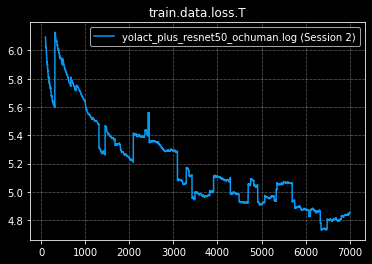

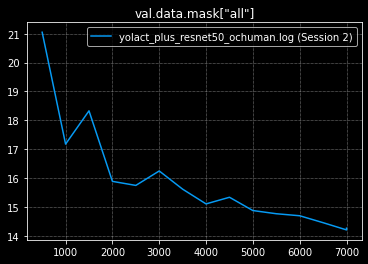

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp1/"
log_file = log_folder + "yolact_plus_resnet50_ochuman.log"

vis.add(log_file, session=2)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp2"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp2"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 2
# 'max_iter': 3000
# 'lr_steps': (.35 * 3000, .75 * 3000, .88 * 3000, .93 * 3000)
!python train.py --save_folder="{save_folder}" --log_folder="{log_folder}" --config=yolact_plus_resnet50_ochuman_exp2_config --resume=weights/yolact_plus_resnet50_54_800000.pth --eval_only_person --validation_iter=250 --start_iter=0 --batch_size=8 --save_interval=250 --lr=1e-5 --momentum=0.9 --decay=5e-4 --gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=0.17s)
creating index...
index created!
loading annotations into memory...
Done (t=0.21s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 1.439 | C: 5.776 | M: 3.386 | S: 0.436 | I: 1.500 | T: 12.536 || ETA: 0:00:00 || timer: 6.594
[  0]      10 || B: 1.182 | C: 2.867 | M: 3.259 | S: 0.325 | I: 0.934 | T: 8.567 || ETA: 0:53:23 || timer: 1.063
[  0]      20 || B: 1.145 | C: 2.323 | M: 3.352 | S: 0.327 | I: 0.801 | T: 7.947 || ETA: 0:53:05 || timer: 1.077
[  0]      30 || B: 1.105 | C: 2.071 | M: 3.303 | S: 0.319 | I: 0.749 | T: 7.546 || ETA: 0:53:08 || timer: 1.072
[  0]      40 || B: 1.059 | C: 1.857 | M: 3.239 | S: 0.309 | I: 0.732 | T: 7.195 || ETA: 0:52:52 || timer: 1.063
[  0]      50 || B: 1.011 | C: 1.720 | M: 3.163 | S: 0.300 | I: 0.707 | T: 6.900 || ETA: 0:52:43 || timer: 1.067
[  0]      60 || B: 0.993 | C: 1.617 | M: 3.081 |

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp2/"
log_file = log_folder + "yolact_plus_resnet50_ochuman.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:     3014 entries | 1:36:28 elapsed


/content/yolact


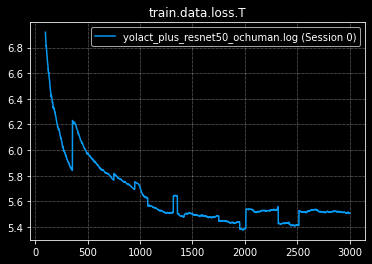

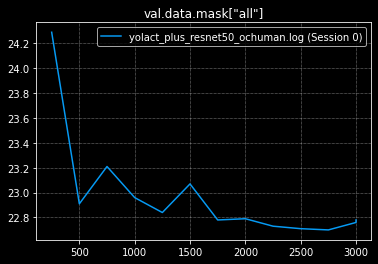

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp2/"
log_file = log_folder + "yolact_plus_resnet50_ochuman.log"

vis.add(log_file, session=0)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp3"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp3"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 3
# Here I have modified yolact.py in order to fine-tune only the final layer.
# Prior experiments fine-tuned the whole network!
# 'max_iter': 3000
# 'lr_steps': (.35 * 3000, .75 * 3000, .88 * 3000, .93 * 3000)
!python train.py --save_folder="{save_folder}" --log_folder="{log_folder}" --config=yolact_plus_resnet50_ochuman_exp3_config --resume=weights/yolact_plus_resnet50_54_800000.pth --eval_only_person --only_last_layer --validation_iter=250 --start_iter=0 --batch_size=8 --save_interval=250 --lr=1e-5 --momentum=0.9 --decay=5e-4 --gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=0.17s)
creating index...
index created!
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 1.116 | C: 2.564 | M: 4.002 | S: 0.545 | I: 1.829 | T: 10.056 || ETA: 0:00:00 || timer: 6.340
[  0]      10 || B: 1.158 | C: 2.964 | M: 3.438 | S: 0.418 | I: 0.817 | T: 8.795 || ETA: 0:53:40 || timer: 1.050
[  0]      20 || B: 1.125 | C: 2.669 | M: 3.320 | S: 0.390 | I: 0.794 | T: 8.298 || ETA: 0:53:10 || timer: 1.060
[  0]      30 || B: 1.084 | C: 2.435 | M: 3.189 | S: 0.362 | I: 0.733 | T: 7.802 || ETA: 0:52:59 || timer: 1.059
[  0]      40 || B: 1.070 | C: 2.274 | M: 3.033 | S: 0.338 | I: 0.704 | T: 7.419 || ETA: 0:52:38 || timer: 1.049
[  0]      50 || B: 1.079 | C: 2.165 | M: 3.042 | S: 0.359 | I: 0.715 | T: 7.360 || ETA: 0:52:27 || timer: 1.057
[  0]      60 || B: 1.061 | C: 2.054 | M: 3.006 |

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp3/"
log_file = log_folder + "yolact_plus_resnet50_ochuman.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:     3014 entries | 1:36:10 elapsed


/content/yolact


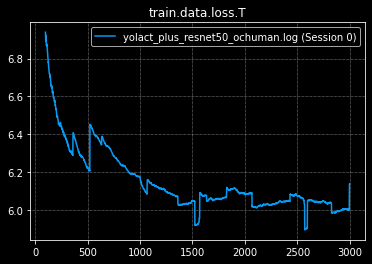

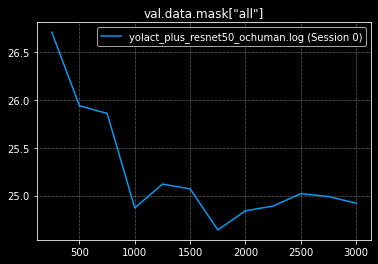

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp3/"
log_file = log_folder + "yolact_plus_resnet50_ochuman.log"

vis.add(log_file, session=0)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

## Cityscapes

### Train (fine-tuning) on Cityscapes Person Rider

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp4"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp4"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 4
# Here I fine-tune only the final layer with default parameters (1e-3 learning rate).
# Here I have set 'augment_expand': False to avoid memory overflow.
# 'max_iter': 1500
# 'lr_steps': (.35 * 1500, .75 * 1500, .88 * 1500, .93 * 1500)
!python train.py \
--save_folder="{save_folder}" \
--log_folder="{log_folder}" \
--config=yolact_plus_resnet50_cityscapes_exp4_config \
--resume=weights/yolact_plus_resnet50_54_800000.pth \
--eval_only_person \
--only_last_layer \
--validation_iter=250 \
--save_interval=250 \
--start_iter=0 \
--batch_size=8 \
--lr=1e-3 \
--momentum=0.9 \
--decay=5e-4 \
--gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=5.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.92s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 2.651 | C: 7.113 | M: 3.733 | S: 0.192 | I: 0.067 | T: 13.755 || ETA: 0:00:00 || timer: 18.634
[  0]      10 || B: 2.657 | C: 5.614 | M: 3.766 | S: 0.153 | I: 0.150 | T: 12.339 || ETA: 1:36:14 || timer: 3.546
[  0]      20 || B: 2.589 | C: 4.321 | M: 3.924 | S: 0.139 | I: 0.161 | T: 11.133 || ETA: 1:33:50 || timer: 3.837
[  0]      30 || B: 2.593 | C: 3.722 | M: 3.994 | S: 0.126 | I: 0.171 | T: 10.606 || ETA: 1:32:45 || timer: 3.893
[  0]      40 || B: 2.548 | C: 3.346 | M: 3.919 | S: 0.114 | I: 0.172 | T: 10.100 || ETA: 1:32:15 || timer: 4.091
[  0]      50 || B: 2.537 | C: 3.106 | M: 3.896 | S: 0.102 | I: 0.174 | T: 9.814 || ETA: 1:30:51 || timer: 3.604
[  0]      60 || B: 2.532 | C: 2.933 | M: 3.

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp4/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp4.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:     1508 entries | 0:56:11 elapsed
Session   1:        2 entries | 0:00:29 elapsed
Session   2:     1508 entries | 2:04:54 elapsed


/content/yolact


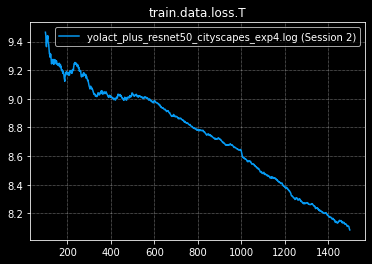

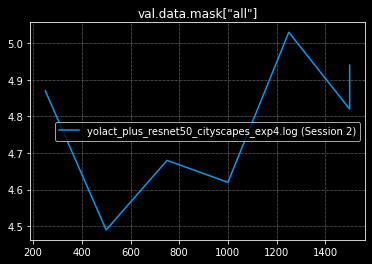

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp4/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp4.log"

vis.add(log_file, session=2)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact

# Save bbox coordinates of Cityscapes Person Rider in a pickle file.
!python scripts/save_bboxes.py

/content/yolact


In [0]:
# Cluster the bbox scales and aspect ratios of Cityscapes Person Rider
!python scripts/cluster_bbox_sizes.py

68.646 (2556) aspect ratios:
	0.24 (2520)
	21.66 (22)
	40.19 (14)

148.538 (5570) aspect ratios:
	0.58 (5390)
	2.80 (128)
	10.52 (52)

207.867 (8196) aspect ratios:
	0.94 (6238)
	1.53 (1790)
	3.56 (168)

256.046 (11354) aspect ratios:
	1.36 (6456)
	1.91 (4134)
	3.03 (764)

300.358 (7114) aspect ratios:
	2.19 (2978)
	1.72 (2454)
	2.73 (1682)



In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp5"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp5"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 5
# Here I fine-tune only the final layer.
# Here I have set 'augment_expand': False to avoid memory overflow.
# Here I have changed the boxes aspect ratios to better fit person class (my intuition).
# (prior experiments used the COCO aspect ratios):
# 'pred_aspect_ratios': [ [[1/3,1/4,1/2]] ]*5
# 'pred_scales': [[i * 2 ** (j / 3.0) for j in range(3)] for i in [24, 48, 96, 192, 384]]
# 'max_iter': 1500
# 'lr_steps': (.35 * 1500, .75 * 1500, .88 * 1500, .93 * 1500)
!python train.py \
--save_folder="{save_folder}" \
--log_folder="{log_folder}" \
--config=yolact_plus_resnet50_cityscapes_exp5_config \
--resume=weights/yolact_plus_resnet50_54_800000.pth \
--eval_only_person \
--only_last_layer \
--validation_iter=250 \
--save_interval=250 \
--start_iter=0 \
--batch_size=8 \
--lr=1e-3 \
--momentum=0.9 \
--decay=5e-4 \
--gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=3.84s)
creating index...
index created!
loading annotations into memory...
Done (t=0.68s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 3.571 | C: 7.213 | M: 4.513 | S: 0.113 | I: 0.587 | T: 15.997 || ETA: 0:00:00 || timer: 13.780
[  0]      10 || B: 3.884 | C: 6.048 | M: 4.458 | S: 0.151 | I: 0.368 | T: 14.910 || ETA: 1:49:09 || timer: 3.568
[  0]      20 || B: 3.606 | C: 4.972 | M: 3.959 | S: 0.144 | I: 0.336 | T: 13.017 || ETA: 1:38:41 || timer: 3.530
[  0]      30 || B: 3.372 | C: 4.291 | M: 3.705 | S: 0.126 | I: 0.293 | T: 11.787 || ETA: 1:35:59 || timer: 3.874
[  0]      40 || B: 3.177 | C: 3.846 | M: 3.613 | S: 0.110 | I: 0.258 | T: 11.005 || ETA: 1:34:56 || timer: 3.801
[  0]      50 || B: 3.032 | C: 3.525 | M: 3.548 | S: 0.097 | I: 0.235 | T: 10.436 || ETA: 1:33:21 || timer: 3.719
[  0]      60 || B: 2.914 | C: 3.290 | M: 3

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp5/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp5.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:       27 entries | 0:01:57 elapsed
Session   1:      104 entries | 0:06:40 elapsed
Session   2:     1508 entries | 2:04:22 elapsed


/content/yolact


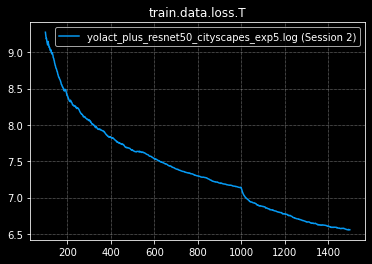

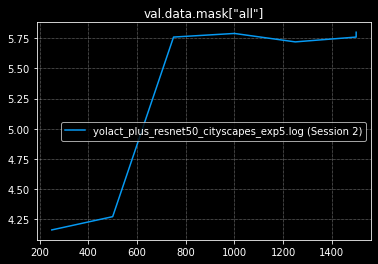

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp5/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp5.log"

vis.add(log_file, session=2)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp6"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp6"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 6
# Here I fine-tune only the final layer.
# Here I have set 'augment_expand': False to avoid memory overflow.
# Here I have changed the boxes aspect ratios to better fit person class (github issue intuition).
# (prior experiments used the COCO aspect ratios):
# 'pred_aspect_ratios': [ [[1/2,1/4,1]] ]*5
# 'pred_scales': [[i * 2 ** (j / 3.0) for j in range(3)] for i in [24, 48, 96, 192, 384]]
# 'max_iter': 1500
# 'lr_steps': (.35 * 1500, .75 * 1500, .88 * 1500, .93 * 1500)
!python train.py \
--save_folder="{save_folder}" \
--log_folder="{log_folder}" \
--config=yolact_plus_resnet50_cityscapes_exp6_config \
--resume=weights/yolact_plus_resnet50_54_800000.pth \
--eval_only_person \
--only_last_layer \
--validation_iter=250 \
--save_interval=250 \
--start_iter=0 \
--batch_size=8 \
--lr=1e-3 \
--momentum=0.9 \
--decay=5e-4 \
--gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=5.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.91s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 3.853 | C: 9.120 | M: 3.075 | S: 0.133 | I: 0.407 | T: 16.588 || ETA: 0:00:00 || timer: 12.807
[  0]      10 || B: 3.407 | C: 6.000 | M: 3.733 | S: 0.146 | I: 0.244 | T: 13.530 || ETA: 1:04:18 || timer: 1.898
[  0]      20 || B: 3.005 | C: 4.523 | M: 3.624 | S: 0.144 | I: 0.252 | T: 11.548 || ETA: 1:04:07 || timer: 5.889
[  0]      30 || B: 2.795 | C: 3.830 | M: 3.593 | S: 0.126 | I: 0.216 | T: 10.559 || ETA: 1:00:04 || timer: 2.212
[  0]      40 || B: 2.677 | C: 3.391 | M: 3.567 | S: 0.110 | I: 0.203 | T: 9.948 || ETA: 0:59:00 || timer: 1.869
[  0]      50 || B: 2.620 | C: 3.180 | M: 3.577 | S: 0.100 | I: 0.199 | T: 9.677 || ETA: 1:02:47 || timer: 2.265
[  0]      60 || B: 2.573 | C: 2.997 | M: 3.5

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp6/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp6.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:     1508 entries | 1:31:32 elapsed


/content/yolact


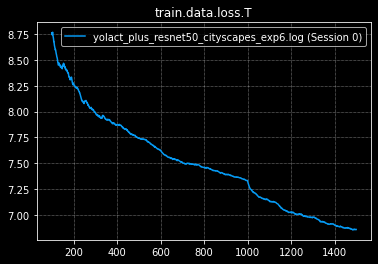

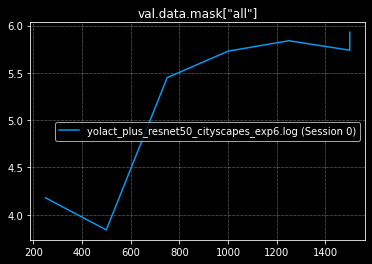

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp6/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp6.log"

vis.add(log_file, session=0)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp7"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp7"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 7
# Here I fine-tune only the final layer.
# Here I have set 'augment_expand': False to avoid memory overflow.
# Here I have changed the boxes aspect ratios to better fit person class (github issue intuition).
# Here I have also reduced the pred_scales.
# 'pred_aspect_ratios': [ [[1/2,1/4,1]] ]*5
# 'pred_scales': [[i * 2 ** (j / 3.0) for j in range(3)] for i in [16, 32, 64, 128, 256]]
# 'max_iter': 1500
# 'lr_steps': (.35 * 1500, .75 * 1500, .88 * 1500, .93 * 1500)
!python train.py \
--save_folder="{save_folder}" \
--log_folder="{log_folder}" \
--config=yolact_plus_resnet50_cityscapes_exp7_config \
--resume=weights/yolact_plus_resnet50_54_800000.pth \
--eval_only_person \
--only_last_layer \
--validation_iter=250 \
--save_interval=250 \
--start_iter=0 \
--batch_size=8 \
--lr=1e-3 \
--momentum=0.9 \
--decay=5e-4 \
--gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=5.30s)
creating index...
index created!
loading annotations into memory...
Done (t=0.92s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 4.638 | C: 7.309 | M: 4.574 | S: 0.148 | I: 0.373 | T: 17.042 || ETA: 0:00:00 || timer: 16.202
[  0]      10 || B: 4.156 | C: 5.425 | M: 3.954 | S: 0.143 | I: 0.289 | T: 13.968 || ETA: 0:51:03 || timer: 1.975
[  0]      20 || B: 3.907 | C: 4.445 | M: 3.782 | S: 0.140 | I: 0.249 | T: 12.524 || ETA: 1:05:49 || timer: 1.729
[  0]      30 || B: 3.749 | C: 3.884 | M: 3.741 | S: 0.125 | I: 0.227 | T: 11.726 || ETA: 1:03:14 || timer: 1.802
[  0]      40 || B: 3.506 | C: 3.527 | M: 3.626 | S: 0.114 | I: 0.212 | T: 10.985 || ETA: 1:02:36 || timer: 2.696
[  0]      50 || B: 3.319 | C: 3.271 | M: 3.550 | S: 0.103 | I: 0.205 | T: 10.448 || ETA: 1:06:46 || timer: 3.107
[  0]      60 || B: 3.179 | C: 3.054 | M: 3

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp7/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp7.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:     1508 entries | 1:33:35 elapsed
Session   1:        2 entries | 0:00:16 elapsed
Session   2:      251 entries | 0:10:56 elapsed
Session   3:        2 entries | 0:00:19 elapsed
Session   4:        6 entries | 0:00:30 elapsed
Session   5:     1508 entries | 1:30:02 elapsed
Session   6:     1508 entries | 1:31:02 elapsed


/content/yolact


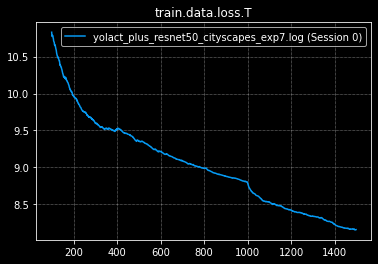

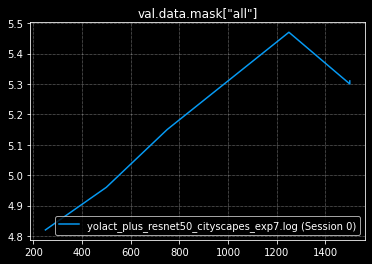

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp7/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp7.log"

vis.add(log_file, session=0)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp8"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp8"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 8
# Here I fine-tune only the final layer.
# Here I have set 'augment_expand': False to avoid memory overflow.
# Here I have changed the boxes aspect ratios to better fit person class (github issue intuition).
# In this experiment I changed this to preserve the original image aspect ratio:
# 'preserve_aspect_ratio': False
# 'pred_aspect_ratios': [ [[1/2,1/4,1]] ]*5
# 'pred_scales': [[i * 2 ** (j / 3.0) for j in range(3)] for i in [24, 48, 96, 192, 384]]
# 'max_iter': 1500
# 'lr_steps': (.35 * 1500, .75 * 1500, .88 * 1500, .93 * 1500)
!python train.py \
--save_folder="{save_folder}" \
--log_folder="{log_folder}" \
--config=yolact_plus_resnet50_cityscapes_exp8_config \
--resume=weights/yolact_plus_resnet50_54_800000.pth \
--eval_only_person \
--only_last_layer \
--validation_iter=250 \
--save_interval=250 \
--start_iter=0 \
--batch_size=8 \
--lr=1e-3 \
--momentum=0.9 \
--decay=5e-4 \
--gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=2.57s)
creating index...
index created!
loading annotations into memory...
Done (t=0.43s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 2.381 | C: 5.482 | M: 3.552 | S: 0.085 | I: 0.063 | T: 11.563 || ETA: 0:00:00 || timer: 12.856
[  0]      10 || B: 2.542 | C: 6.015 | M: 4.059 | S: 0.124 | I: 0.175 | T: 12.914 || ETA: 0:55:55 || timer: 2.782
[  0]      20 || B: 2.748 | C: 4.692 | M: 4.040 | S: 0.122 | I: 0.151 | T: 11.753 || ETA: 0:54:02 || timer: 1.961
[  0]      30 || B: 2.923 | C: 4.009 | M: 4.023 | S: 0.109 | I: 0.155 | T: 11.218 || ETA: 1:00:32 || timer: 2.004
[  0]      40 || B: 3.007 | C: 3.653 | M: 4.100 | S: 0.097 | I: 0.154 | T: 11.011 || ETA: 0:59:44 || timer: 2.413
[  0]      50 || B: 3.032 | C: 3.405 | M: 4.104 | S: 0.087 | I: 0.155 | T: 10.783 || ETA: 1:00:33 || timer: 1.984
[  0]      60 || B: 2.923 | C: 3.177 | M: 4

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp8/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp8.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:     1508 entries | 1:25:28 elapsed


/content/yolact


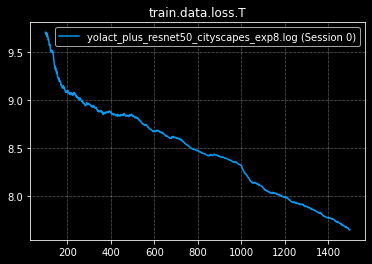

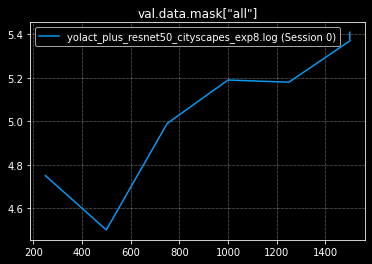

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp8/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp8.log"

vis.add(log_file, session=0)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp9"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp9"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 9
# This is equal to experiment 6, but with more iterations
# 'pred_aspect_ratios': [ [[1/2,1/4,1]] ]*5
# 'pred_scales': [[i * 2 ** (j / 3.0) for j in range(3)] for i in [24, 48, 96, 192, 384]]
# 'max_iter': 3000
# 'lr_steps': (.35 * 3000, .75 * 3000, .88 * 3000, .93 * 3000)
!python train.py \
--save_folder="{save_folder}" \
--log_folder="{log_folder}" \
--config=yolact_plus_resnet50_cityscapes_exp9_config \
--resume=weights/yolact_plus_resnet50_54_800000.pth \
--eval_only_person \
--only_last_layer \
--validation_iter=250 \
--save_interval=250 \
--start_iter=0 \
--batch_size=8 \
--lr=1e-3 \
--momentum=0.9 \
--decay=5e-4 \
--gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=5.26s)
creating index...
index created!
loading annotations into memory...
Done (t=0.92s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 3.683 | C: 6.629 | M: 3.681 | S: 0.116 | I: 0.588 | T: 14.697 || ETA: 0:00:00 || timer: 15.386
[  0]      10 || B: 3.432 | C: 5.318 | M: 4.022 | S: 0.157 | I: 0.306 | T: 13.235 || ETA: 2:04:48 || timer: 5.689
[  0]      20 || B: 3.130 | C: 4.350 | M: 3.870 | S: 0.143 | I: 0.271 | T: 11.764 || ETA: 2:04:25 || timer: 1.491
[  0]      30 || B: 2.894 | C: 3.684 | M: 3.746 | S: 0.125 | I: 0.242 | T: 10.691 || ETA: 2:11:35 || timer: 2.031
[  0]      40 || B: 2.786 | C: 3.336 | M: 3.705 | S: 0.110 | I: 0.220 | T: 10.158 || ETA: 2:12:50 || timer: 1.525
[  0]      50 || B: 2.645 | C: 3.106 | M: 3.613 | S: 0.100 | I: 0.225 | T: 9.689 || ETA: 2:15:04 || timer: 1.770
[  0]      60 || B: 2.575 | C: 2.950 | M: 3.

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp9/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp9.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:     3014 entries | 3:01:26 elapsed


/content/yolact


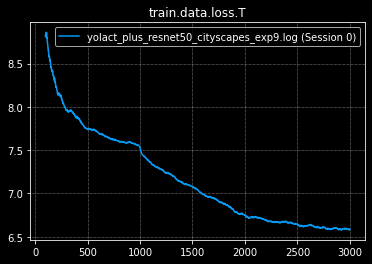

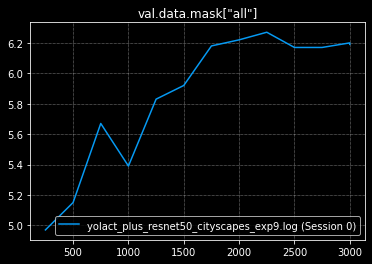

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp9/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp9.log"

vis.add(log_file, session=0)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp10"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp10"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 10
# In this experiment I take the model from experiment 9 and fine-tune
# the whole network instead of only the final layer.
# 'pred_aspect_ratios': [ [[1/2,1/4,1]] ]*5
# 'pred_scales': [[i * 2 ** (j / 3.0) for j in range(3)] for i in [24, 48, 96, 192, 384]]
# 'max_iter': 40000
# 'lr_steps': (.35 * 40000, .75 * 40000, .88 * 40000, .93 * 40000)
!python train.py \
--save_folder="{save_folder}" \
--log_folder="{log_folder}" \
--config=yolact_plus_resnet50_cityscapes_exp10_config \
--resume=/content/gdrive/My\ Drive/yolact/data/checkpoints/exp9/yolact_plus_resnet50_cityscapes_exp9_10_3000.pth \
--eval_only_person \
--validation_iter=1000 \
--save_interval=1000 \
--start_iter=0 \
--batch_size=7 \
--lr=1e-5 \
--momentum=0.9 \
--decay=5e-4 \
--gamma=0.1

/content/yolact
Scaling parameters by 0.88 to account for a batch size of 7.
loading annotations into memory...
Done (t=2.48s)
creating index...
index created!
loading annotations into memory...
Done (t=0.40s)
creating index...
index created!
Resuming training, loading /content/gdrive/My Drive/yolact/data/checkpoints/exp9/yolact_plus_resnet50_cityscapes_exp9_10_3000.pth...
Begin training!

[  0]       0 || B: 1.490 | C: 1.618 | M: 2.586 | S: 0.024 | I: 0.175 | T: 5.892 || ETA: 0:00:00 || timer: 14.296
[  0]      10 || B: 1.549 | C: 1.532 | M: 2.833 | S: 0.014 | I: 0.135 | T: 6.062 || ETA: 1 day, 2:53:57 || timer: 2.262
[  0]      20 || B: 1.519 | C: 1.514 | M: 2.796 | S: 0.016 | I: 0.116 | T: 5.960 || ETA: 1 day, 4:47:07 || timer: 2.833
[  0]      30 || B: 1.618 | C: 1.634 | M: 2.957 | S: 0.016 | I: 0.127 | T: 6.353 || ETA: 1 day, 6:41:46 || timer: 2.123
[  0]      40 || B: 1.683 | C: 1.633 | M: 3.017 | S: 0.017 | I: 0.128 | T: 6.478 || ETA: 1 day, 9:44:05 || timer: 2.036
[  0]      50

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp10/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp10.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:        2 entries | 0:00:21 elapsed
Session   1:        2 entries | 0:00:22 elapsed
Session   2:     6600 entries | 5:14:47 elapsed


/content/yolact


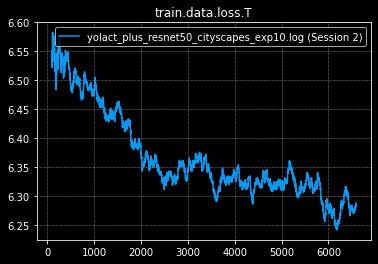

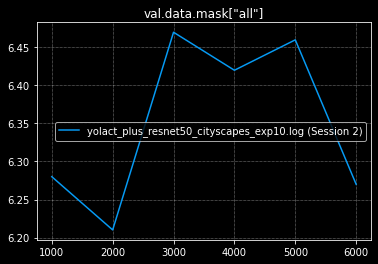

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp10/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp10.log"

vis.add(log_file, session=2)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

### Train (fine-tuning) on Cityscapes Person

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp11"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp11"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 11
# Here I fine-tune only the final layer with default parameters (1e-3 learning rate).
# Here I have set 'augment_expand': False to avoid memory overflow.
# 'max_iter': 1500
# 'lr_steps': (.35 * 1500, .75 * 1500, .88 * 1500, .93 * 1500)
!python train.py \
--save_folder="{save_folder}" \
--log_folder="{log_folder}" \
--config=yolact_plus_resnet50_cityscapes_exp11_config \
--resume=weights/yolact_plus_resnet50_54_800000.pth \
--eval_only_person \
--only_last_layer \
--validation_iter=250 \
--save_interval=250 \
--start_iter=0 \
--batch_size=8 \
--lr=1e-3 \
--momentum=0.9 \
--decay=5e-4 \
--gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=2.42s)
creating index...
index created!
loading annotations into memory...
Done (t=0.43s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 1.122 | C: 10.620 | M: 2.711 | S: 0.148 | I: 0.145 | T: 14.747 || ETA: 0:00:00 || timer: 11.374
[  0]      10 || B: 2.671 | C: 6.544 | M: 4.060 | S: 0.147 | I: 0.208 | T: 13.629 || ETA: 0:41:22 || timer: 1.487
[  0]      20 || B: 2.436 | C: 4.806 | M: 3.852 | S: 0.143 | I: 0.180 | T: 11.417 || ETA: 0:40:44 || timer: 1.560
[  0]      30 || B: 2.298 | C: 4.004 | M: 3.768 | S: 0.123 | I: 0.231 | T: 10.424 || ETA: 0:40:36 || timer: 1.661
[  0]      40 || B: 2.202 | C: 3.539 | M: 3.686 | S: 0.109 | I: 0.208 | T: 9.744 || ETA: 0:40:56 || timer: 1.706
[  0]      50 || B: 2.231 | C: 3.286 | M: 3.749 | S: 0.098 | I: 0.201 | T: 9.565 || ETA: 0:42:27 || timer: 4.484
[  0]      60 || B: 2.237 | C: 3.077 | M: 3.

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp11/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp11.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:     1508 entries | 0:58:56 elapsed


/content/yolact


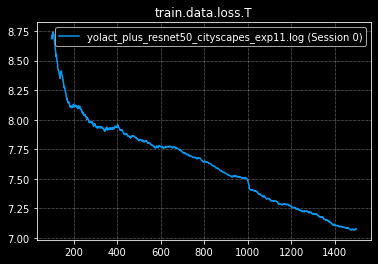

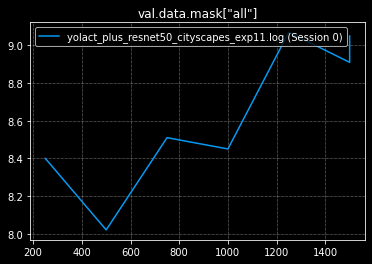

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp11/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp11.log"

vis.add(log_file, session=0)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp12"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp12"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 12
# (Questo è quello buono sul video demo, ultimo modello)
# Here I fine-tune only the final layer with default parameters but lower learning rate (1e-4).
# Here I have set 'augment_expand': False to avoid memory overflow.
# 'max_iter': 1500
# 'lr_steps': (.35 * 1500, .75 * 1500, .88 * 1500, .93 * 1500)
!python train.py \
--save_folder="{save_folder}" \
--log_folder="{log_folder}" \
--config=yolact_plus_resnet50_cityscapes_exp12_config \
--resume=weights/yolact_plus_resnet50_54_800000.pth \
--eval_only_person \
--only_last_layer \
--validation_iter=250 \
--save_interval=250 \
--start_iter=0 \
--batch_size=8 \
--lr=1e-4 \
--momentum=0.9 \
--decay=5e-4 \
--gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=2.34s)
creating index...
index created!
loading annotations into memory...
Done (t=0.43s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 2.083 | C: 4.736 | M: 3.352 | S: 0.127 | I: 0.214 | T: 10.513 || ETA: 0:00:00 || timer: 12.064
[  0]      10 || B: 1.988 | C: 6.374 | M: 3.110 | S: 0.146 | I: 0.147 | T: 11.764 || ETA: 0:38:00 || timer: 1.703
[  0]      20 || B: 2.330 | C: 4.710 | M: 3.546 | S: 0.138 | I: 0.145 | T: 10.869 || ETA: 0:39:22 || timer: 1.637
[  0]      30 || B: 2.465 | C: 4.025 | M: 3.721 | S: 0.127 | I: 0.151 | T: 10.489 || ETA: 0:39:39 || timer: 1.534
[  0]      40 || B: 2.380 | C: 3.590 | M: 3.697 | S: 0.116 | I: 0.144 | T: 9.926 || ETA: 0:39:41 || timer: 1.611
[  0]      50 || B: 2.351 | C: 3.299 | M: 3.735 | S: 0.106 | I: 0.143 | T: 9.635 || ETA: 0:40:11 || timer: 1.602
[  0]      60 || B: 2.335 | C: 3.110 | M: 3.7

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp12/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp12.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:        2 entries | 0:00:18 elapsed
Session   1:     1508 entries | 0:59:02 elapsed


/content/yolact


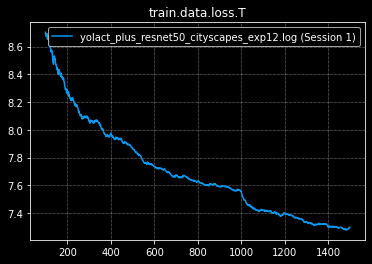

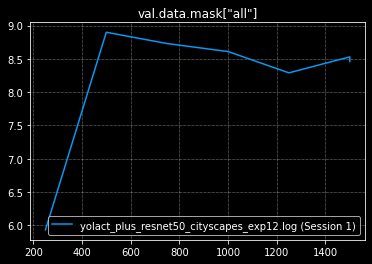

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp12/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp12.log"

vis.add(log_file, session=1)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp13"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp13"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 13
# Here I fine-tune only the final layer with default parameters very low learning rate (1e-5).
# Here I have set 'augment_expand': False to avoid memory overflow.
# 'max_iter': 1500
# 'lr_steps': (.35 * 1500, .75 * 1500, .88 * 1500, .93 * 1500)
!python train.py \
--save_folder="{save_folder}" \
--log_folder="{log_folder}" \
--config=yolact_plus_resnet50_cityscapes_exp13_config \
--resume=weights/yolact_plus_resnet50_54_800000.pth \
--eval_only_person \
--only_last_layer \
--validation_iter=250 \
--save_interval=250 \
--start_iter=0 \
--batch_size=8 \
--lr=1e-5 \
--momentum=0.9 \
--decay=5e-4 \
--gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=2.40s)
creating index...
index created!
loading annotations into memory...
Done (t=0.43s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 2.941 | C: 5.762 | M: 4.587 | S: 0.151 | I: 0.042 | T: 13.482 || ETA: 0:00:00 || timer: 16.394
[  0]      10 || B: 2.581 | C: 5.443 | M: 4.035 | S: 0.141 | I: 0.172 | T: 12.372 || ETA: 0:43:57 || timer: 1.779
[  0]      20 || B: 2.353 | C: 4.269 | M: 3.738 | S: 0.138 | I: 0.198 | T: 10.695 || ETA: 0:42:59 || timer: 1.831
[  0]      30 || B: 2.276 | C: 3.678 | M: 3.670 | S: 0.128 | I: 0.181 | T: 9.933 || ETA: 0:41:51 || timer: 1.623
[  0]      40 || B: 2.315 | C: 3.338 | M: 3.626 | S: 0.118 | I: 0.204 | T: 9.602 || ETA: 0:41:44 || timer: 1.943
[  0]      50 || B: 2.324 | C: 3.129 | M: 3.705 | S: 0.110 | I: 0.203 | T: 9.472 || ETA: 0:41:46 || timer: 1.554
[  0]      60 || B: 2.251 | C: 2.972 | M: 3.63

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp13/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp13.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:     1508 entries | 0:59:17 elapsed
Session   1:     1508 entries | 1:00:24 elapsed


/content/yolact


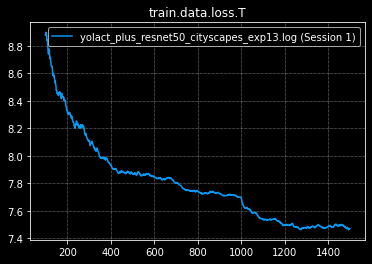

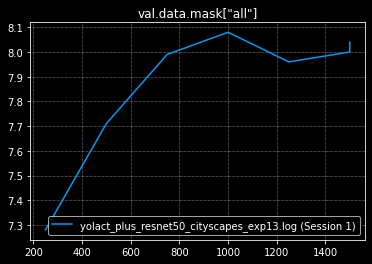

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp13/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp13.log"

vis.add(log_file, session=1)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp14"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp14"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 14
# Here I fine-tune only the final layer.
# Here I have set 'augment_expand': False to avoid memory overflow.
# Here I have changed the boxes aspect ratios to better fit person class (github issue intuition).
# (prior experiments used the COCO aspect ratios):
# 'pred_aspect_ratios': [ [[1/2,1/4,1]] ]*5
# 'pred_scales': [[i * 2 ** (j / 3.0) for j in range(3)] for i in [24, 48, 96, 192, 384]]
# 'max_iter': 1500
# 'lr_steps': (.35 * 1500, .75 * 1500, .88 * 1500, .93 * 1500)
!python train.py \
--save_folder="{save_folder}" \
--log_folder="{log_folder}" \
--config=yolact_plus_resnet50_cityscapes_exp14_config \
--resume=weights/yolact_plus_resnet50_54_800000.pth \
--eval_only_person \
--only_last_layer \
--validation_iter=250 \
--save_interval=250 \
--start_iter=0 \
--batch_size=8 \
--lr=1e-3 \
--momentum=0.9 \
--decay=5e-4 \
--gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=2.43s)
creating index...
index created!
loading annotations into memory...
Done (t=0.43s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 3.559 | C: 7.059 | M: 3.995 | S: 0.145 | I: 0.198 | T: 14.957 || ETA: 0:00:00 || timer: 12.241
[  0]      10 || B: 2.915 | C: 5.149 | M: 3.425 | S: 0.138 | I: 0.251 | T: 11.878 || ETA: 0:45:32 || timer: 1.941
[  0]      20 || B: 2.751 | C: 4.003 | M: 3.456 | S: 0.137 | I: 0.229 | T: 10.577 || ETA: 0:46:07 || timer: 1.886
[  0]      30 || B: 2.584 | C: 3.501 | M: 3.438 | S: 0.120 | I: 0.224 | T: 9.866 || ETA: 0:45:08 || timer: 1.742
[  0]      40 || B: 2.505 | C: 3.217 | M: 3.395 | S: 0.108 | I: 0.205 | T: 9.431 || ETA: 0:44:12 || timer: 1.634
[  0]      50 || B: 2.386 | C: 2.982 | M: 3.300 | S: 0.095 | I: 0.190 | T: 8.954 || ETA: 0:43:18 || timer: 1.660
[  0]      60 || B: 2.320 | C: 2.820 | M: 3.29

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp14/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp14.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:     1508 entries | 0:59:01 elapsed


/content/yolact


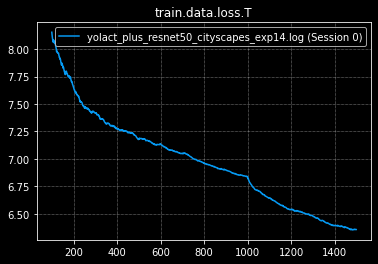

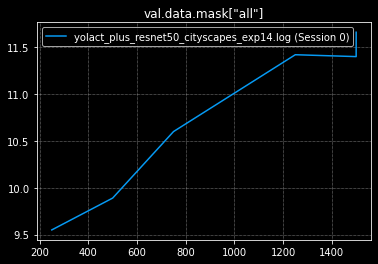

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp14/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp14.log"

vis.add(log_file, session=0)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp15"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp15"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 15
# This is equal to experiment 14, but with more iterations (3000).
# 'pred_aspect_ratios': [ [[1/2,1/4,1]] ]*5
# 'pred_scales': [[i * 2 ** (j / 3.0) for j in range(3)] for i in [24, 48, 96, 192, 384]]
# 'max_iter': 3000
# 'lr_steps': (.35 * 3000, .75 * 3000, .88 * 3000, .93 * 3000)
!python train.py \
--save_folder="{save_folder}" \
--log_folder="{log_folder}" \
--config=yolact_plus_resnet50_cityscapes_exp15_config \
--resume=weights/yolact_plus_resnet50_54_800000.pth \
--eval_only_person \
--only_last_layer \
--validation_iter=250 \
--save_interval=250 \
--start_iter=0 \
--batch_size=8 \
--lr=1e-3 \
--momentum=0.9 \
--decay=5e-4 \
--gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=2.42s)
creating index...
index created!
loading annotations into memory...
Done (t=0.43s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 3.872 | C: 5.464 | M: 3.606 | S: 0.185 | I: 0.366 | T: 13.493 || ETA: 0:00:00 || timer: 13.024
[  0]      10 || B: 3.150 | C: 4.765 | M: 3.433 | S: 0.163 | I: 0.311 | T: 11.821 || ETA: 1:16:13 || timer: 1.545
[  0]      20 || B: 2.834 | C: 4.074 | M: 3.339 | S: 0.148 | I: 0.264 | T: 10.659 || ETA: 1:15:56 || timer: 2.032
[  0]      30 || B: 2.735 | C: 3.602 | M: 3.345 | S: 0.135 | I: 0.245 | T: 10.062 || ETA: 1:19:49 || timer: 1.559
[  0]      40 || B: 2.595 | C: 3.281 | M: 3.340 | S: 0.118 | I: 0.233 | T: 9.567 || ETA: 1:20:14 || timer: 3.636
[  0]      50 || B: 2.486 | C: 3.039 | M: 3.308 | S: 0.105 | I: 0.228 | T: 9.165 || ETA: 1:20:56 || timer: 1.378
[  0]      60 || B: 2.399 | C: 2.883 | M: 3.2

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp15/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp15.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:      251 entries | 0:07:00 elapsed
Session   1:     3014 entries | 1:50:11 elapsed


/content/yolact


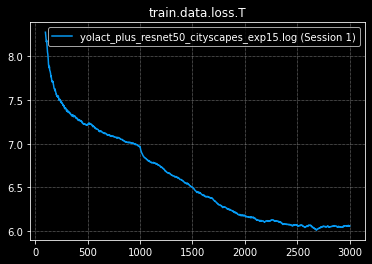

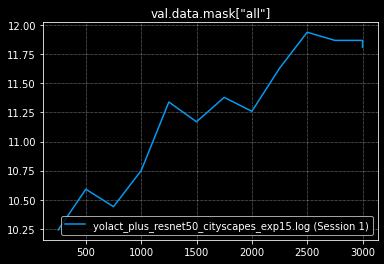

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp15/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp15.log"

vis.add(log_file, session=1)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp16"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp16"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 16
# In this experiment I take the model from experiment 15 and fine-tune
# the whole network instead of only the final layer.
# 'pred_aspect_ratios': [ [[1/2,1/4,1]] ]*5
# 'pred_scales': [[i * 2 ** (j / 3.0) for j in range(3)] for i in [24, 48, 96, 192, 384]]
# 'max_iter': 6000
# 'lr_steps': (.35 * 6000, .75 * 6000, .88 * 6000, .93 * 6000)
!python train.py \
--save_folder="{save_folder}" \
--log_folder="{log_folder}" \
--config=yolact_plus_resnet50_cityscapes_exp16_config \
--resume=/content/gdrive/My\ Drive/yolact/data/checkpoints/exp15/yolact_plus_resnet50_cityscapes_exp15_8_2500.pth \
--eval_only_person \
--validation_iter=500 \
--save_interval=500 \
--start_iter=0 \
--batch_size=8 \
--lr=1e-5 \
--momentum=0.9 \
--decay=5e-4 \
--gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=2.42s)
creating index...
index created!
loading annotations into memory...
Done (t=0.42s)
creating index...
index created!
Resuming training, loading /content/gdrive/My Drive/yolact/data/checkpoints/exp15/yolact_plus_resnet50_cityscapes_exp15_8_2500.pth...
Begin training!

[  0]       0 || B: 0.908 | C: 1.119 | M: 2.252 | S: 0.009 | I: 0.079 | T: 4.367 || ETA: 0:00:00 || timer: 11.504
[  0]      10 || B: 1.504 | C: 1.506 | M: 2.843 | S: 0.017 | I: 0.088 | T: 5.957 || ETA: 2:31:04 || timer: 1.657
[  0]      20 || B: 1.625 | C: 1.494 | M: 3.078 | S: 0.016 | I: 0.106 | T: 6.319 || ETA: 3:08:24 || timer: 5.927
[  0]      30 || B: 1.588 | C: 1.503 | M: 2.977 | S: 0.018 | I: 0.129 | T: 6.215 || ETA: 2:55:34 || timer: 1.481
[  0]      40 || B: 1.539 | C: 1.523 | M: 2.894 | S: 0.017 | I: 0.125 | T: 6.098 || ETA: 2:47:36 || timer: 1.446
[  0]      50 || B: 1.532 | C: 1.521 | M: 2.897 | S: 0.017 | I: 0.135 | T: 6.102 || ETA: 2:52:07 || t

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp16/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp16.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:     6014 entries | 3:23:24 elapsed


/content/yolact


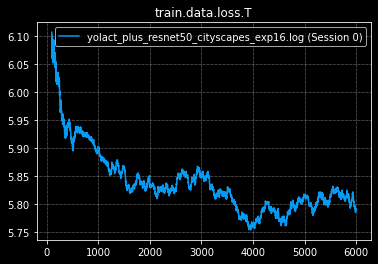

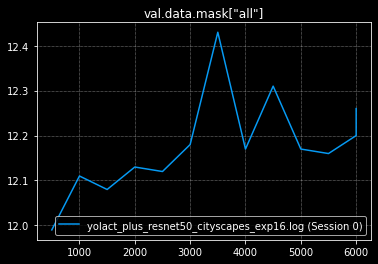

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp16/"
log_file = log_folder + "yolact_plus_resnet50_cityscapes_exp16.log"

vis.add(log_file, session=0)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')